<a href="https://colab.research.google.com/github/vishal00880/summer-git/blob/main/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/supply_chain - supply_chain.csv")

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
pip install plotly

In [6]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [7]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [10]:
pip install statsmodels

In [12]:
fig = px.scatter(df,x='Price',
                 y='Revenue generated', # Corrected column name
                 color='Product type',
                 hover_data=['Number of products sold'],
                 trendline="ols")
fig.show()

In [16]:
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()
pie_chart = px.pie(sales_data, values='Number of products sold',
                   title='Sales by product type',
                   hover_data=['Number of products sold'],
                   hole = 0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition='inside',textinfo='percent+label')
pie_chart.show()

In [18]:
total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carriers',
                  xaxis_title='Shipping Carriers',
                  yaxis_title='Total Revenue')
fig.show()

In [20]:
avg_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result= pd.merge(avg_lead_time,avg_manufacturing_costs,on='Product type')
result.rename(columns={'Lead time':'Average Lead Time','Manufacturing costs':'Average Manufacturing Costs'},
              inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


In [27]:
stock_chart = px.line(df ,x='SKU' ,
                      y='Stock levels',
                      title ='Stock level by SKU')
stock_chart.show()

In [28]:
revenue_chart = px.line(df ,x='SKU' ,
                      y='Revenue generated',
                      title ='Revenue generated by SKU')
revenue_chart.show()

In [29]:
order_quantity_chart = px.bar(df , x ='SKU',
                              y ='Order quantities',
                              title ='Order Quantity by SKU')
order_quantity_chart.show()

In [30]:
shipping_cost_chart = px.bar(df , x ='Shipping carriers' ,
                        y= 'Shipping costs' ,
                        title = 'Shipping Cost by Shipping Carrier')
shipping_cost_chart.show()

In [31]:
transportation_chart = px.pie(df,
                               values='Costs',
                               names='Shipping carriers',
                               title='Cost Distribution by Transportation Mode',
                               hole = 0.5,
                               color_discrete_sequence = px.colors.qualitative.Pastel)
transportation_chart.show()

In [32]:
df =pd.read_csv("/content/linkedin-reviews - linkedin-reviews.csv")
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

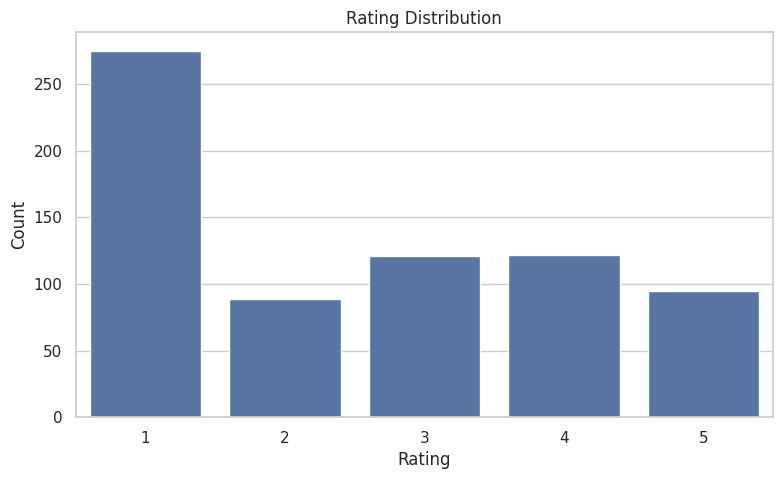

In [35]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df , x= 'Rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

In [37]:
pip install textblob

In [38]:
from textblob import TextBlob

In [39]:
def textblob_sentiment_analysis(review):
  sentiment = TextBlob(review).sentiment
  if sentiment.polarity > 0.1:
    return 'Positive'
  elif sentiment.polarity < 0.1:
    return 'Negative'
  else:
    return 'Neutral'


In [40]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [41]:
df.sample(5)

,Review,Rating,Sentiment
12,Simple. Basic. But works perfectly for main fu...,3,Positive
357,Won't load any changes.,1,Negative
151,Every action takes way too long to load. Worse...,2,Negative
420,It keeps crashing all the time after i updated it,1,Negative
121,App to SD needed - uninstalling until then.,1,Negative


In [43]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distributionaaa

,count
Sentiment,
Negative,393
Positive,298
Neutral,11
